# Function optimization

A common occurrence in several domains of engineering is that we need to optimize a certain function of some variables.  For example: $f(x) = x^2$.  Here we have a function of one variable ($x$) and we want to find the *minimum* value of that function over all values of $x$.  Of course, in this case we know that our objective is to minimize rather than maximize -- this may not always be the same option.

This of course is precisely what Calculus is so good at: by setting the derivative of the function to 0, we can solve the equation to find the value of $x$ that gives a possible optimum value.  In the present case, $f'(x) = 2x \Rightarrow x = 0$ will give us the *optimum* (in this case the minimum).

But what if we wanted to do this the *hard* way - actually do it numerically.  In this case it may be the painful way, but in general it might be useful.  So let us first get the big picture - what does our function actually look like?

In [1]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

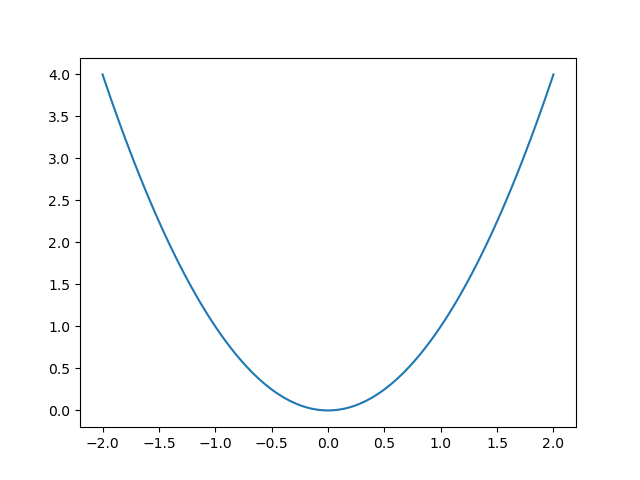

In [2]:

# Create the axis and function
xbase = np.linspace(-2, 2, 100)
def yfunc(x):
    return x ** 2
ybase = yfunc(xbase)
plt.clf()
plt.plot(xbase, ybase)

## Iterative improvement

If we don't know how to optimize, one possible approach is to throw darts - make a random guess, and see how good the present value is.  If the new value is better than the old one, retain it, else make a new guess.  Keep doing this for a large number of guesses.

In [3]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = -100
rangemin, rangemax = -2, 2 
def var1():
    fig, ax = plt.subplots()
    ax.plot(xbase, ybase)
    xall, yall = [], []
    lnall,  = ax.plot([], [], 'ro')
    lngood, = ax.plot([], [], 'go', markersize=10)
    def onestep(frame):
        global bestcost, bestx
        # Generate a random value \in -2, +2
        x = np.random.random_sample() * 4 - 2
        y = yfunc(x)
        if y < bestcost:
            # print(f"Improved from {bestcost} at {bestx} to {y} at {x}")
            bestcost = y
            bestx = x
            lngood.set_data(x, y)
        else:
            # print(f"New cost {y} worse than best so far: {bestcost}")
            pass
        xall.append(x)
        yall.append(y)
        lnall.set_data(xall, yall)
        # return lngood,

    ani= FuncAnimation(fig, onestep, frames=range(10), interval=1000, repeat=False)

## Systematic improvement

Instead of randomly guessing values, is there a better way to proceed?  What if we know what kind of change in $x$ would result in a good change in $y$?  Can we *guide* the optimization process so it reaches the minimum in fewer steps?

One way to do this is to recognize that at any point, the derivative of y can be used to guide the direction of improvement.  Let us say we are trying to minimize the function $f(x)$.

$$
f(x + dx) \approx f(x) + f'(x) dx
$$

If $f'(x)>0$, the curve is sloping upwards as we increase $x$.  So we should go in the opposite direction, that is, decrease $x$.  Alternatively, if $f'(x)<0$, the function will decrease if we increase $x$, so we should increase $x$.  In other words, either way we should go in the opposite direction to $f'(x)$.

### How much?

So we know the direction, but how much should we change $x$?  If we change by a constant amount, then the change in $f(x)$ will be proportional to the value of $f'$ at that point.  But intuitively, it would seem that if there is a rapid change in the function, then it makes sense to take a larger step in the hope of reaching the optimum faster.  

At the same time, too large a step could make us overshoot, and then we would have to come back.  

Finally, a fixed step size would eventually get us to the right place, but it could take a long time if we are far away from the optimum, even though the gradient indicates that there is likely to be a large change in the function.

This is captured using a parameter called the *learning rate*.  By modifying the learning rate, we can control how quickly we move towards the optimum.

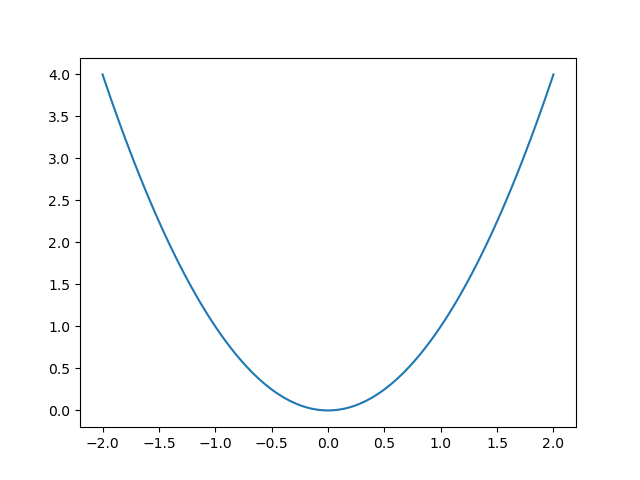

In [4]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 2
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def yprimefunc(x):
    return 2 * x

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - yprimefunc(bestx) * lr 
    bestx = x
    y = yfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    # return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

## Multiple optima

Consider the function $f(x) = x^4 - 2 x^3 + 3 x^2 + 5x +10$

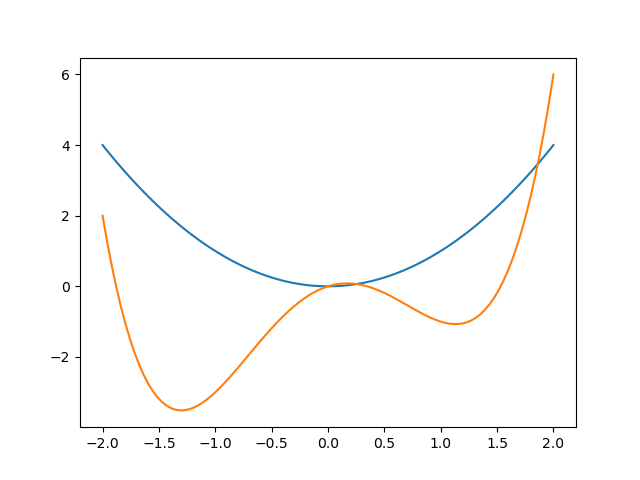

In [5]:
def cfunc(x):
    return x**4 - 3*x**2 + 1*x 

def cfuncd(x):
    return 4*x**3 -6*x + 1

xbase = np.linspace(-2, 2, 100)
ybase = cfunc(xbase)

plt.clf()
plt.close()
plt.plot(xbase, ybase)
plt.show()

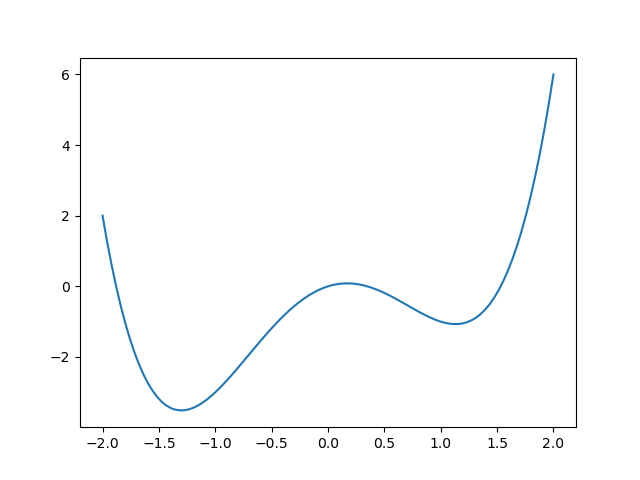

In [7]:
# Set up some large value for the best cost found so far
bestcost = 100000
# Generate several values within a search 'space' and check whether the new value is better
# than the best seen so far.
bestx = 0
rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)

# Learning rate 
lr = 0.1

def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - cfuncd(bestx) * lr 
    bestx = x
    y = cfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,

ani= FuncAnimation(fig, onestepderiv, frames=range(10), interval=1000, repeat=False)
plt.show()

#Thing()

# Assignment

- Implement a function that takes the following inputs, and finds the minimum using gradient descent
  - Function definition (one variable)
  - Derivative (also a function definition)
  - Starting point
  - Learning rate
- Repeat the above, but with 2 or more variables (you will be tested with different functions with different numbers of variables depending on what you have implemented)
- Use 3-D plots to show the path taken by a 2 variable optimization

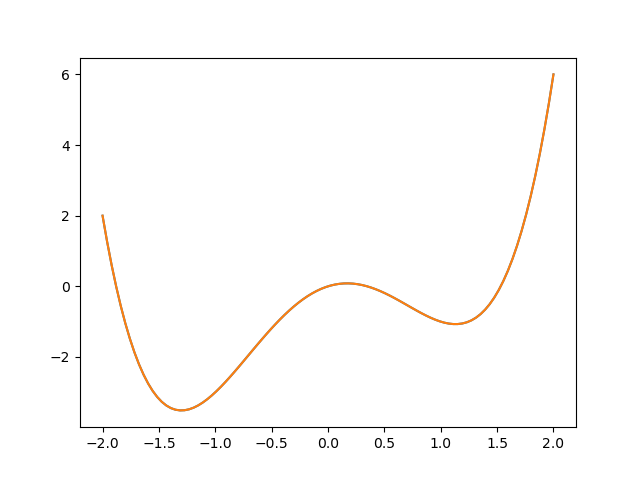

In [8]:
# Set up the imports
%matplotlib ipympl
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

def cfunc(x):
    return x**4 - 3*x**2 + 1*x 

def cfuncd(x):
    return 4*x**3 -6*x + 1

xbase = np.linspace(-2, 2, 100)
ybase = cfunc(xbase)

# Set up some large value for the best cost found so far
bestcost = 100000

rangemin, rangemax = -5, 5 
fig, ax = plt.subplots()
ax.plot(xbase, ybase)
xall, yall = [], []
lnall,  = ax.plot([], [], 'ro')
lngood, = ax.plot([], [], 'go', markersize=10)


def onestepderiv(frame):
    global bestcost, bestx, lr
    x = bestx - cfuncd(bestx) * lr 
    bestx = x
    y = cfunc(x)
    lngood.set_data(x, y)
    xall.append(x)
    yall.append(y)
    lnall.set_data(xall, yall)
    return lngood,


def Plot_grad(Eqn,derivative,start,learning):
    xbase = np.linspace(-2, 2, 100)
    ybase = Eqn(xbase)
    global bestcost, bestx, lr
    bestx = start
    plt.plot(xbase, ybase)
    lr = learning

Plot_grad(cfunc,cfuncd,0,0.05)
ani= FuncAnimation(fig, onestepderiv,frames=range(10), interval=1000, repeat=False)
plt.show()



